In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', None)

import pylab as plt
import seaborn as sns

%matplotlib inline

%pip install regex
import re

Note: you may need to restart the kernel to use updated packages.


In [2]:
import csv

df_ori = pd.read_csv('./attacks.csv', encoding = 'latin')

In [3]:
df = df_ori.copy()

In [4]:
df_ori.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


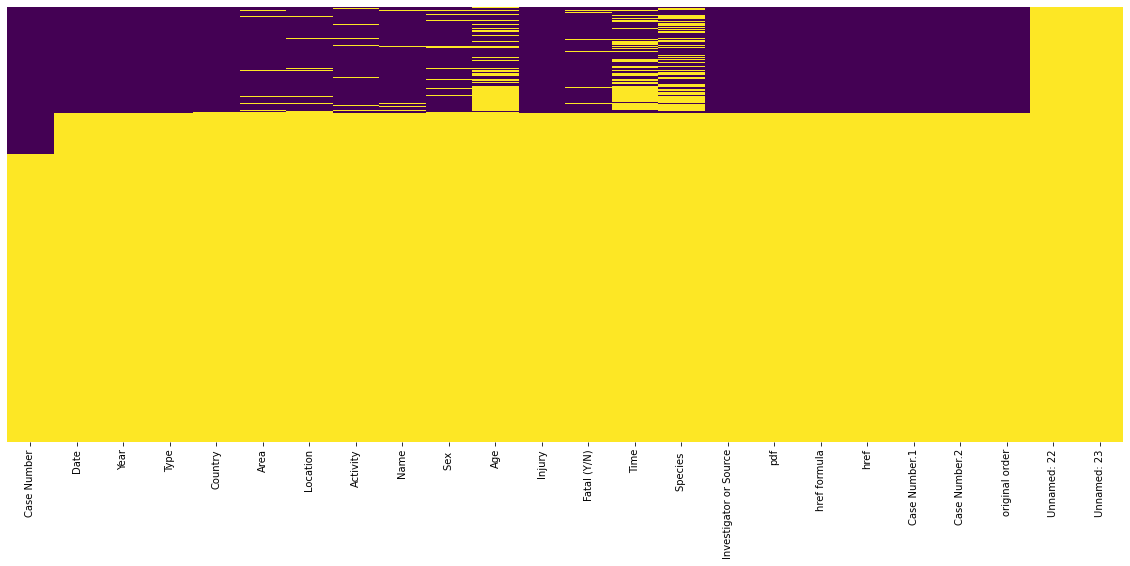

In [5]:
plt.figure(figsize=(20, 8))  

sns.heatmap(df.isna(), 
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.shape

(6312, 24)

In [8]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6310 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [9]:
nan_cols = df.isna().sum()

nan_cols[nan_cols > 0]

Case Number                  2
Date                        10
Year                        12
Type                        14
Country                     60
Area                       465
Location                   550
Activity                   554
Name                       220
Sex                        575
Age                       2841
Injury                      38
Fatal (Y/N)                549
Time                      3364
Species                   2848
Investigator or Source      27
pdf                         10
href formula                11
href                        10
Case Number.1               10
Case Number.2               10
original order               3
Unnamed: 22               6311
Unnamed: 23               6310
dtype: int64

In [10]:
x = (df.isna().mean() * 100) >= 80
df.drop(columns = x[x == True].index, inplace = True)

In [11]:
df.tail(0)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order


In [12]:
df.fillna('unknown', inplace = True)

In [13]:
nan_cols = df.isna().sum()

nan_cols[nan_cols > 0]

Series([], dtype: int64)

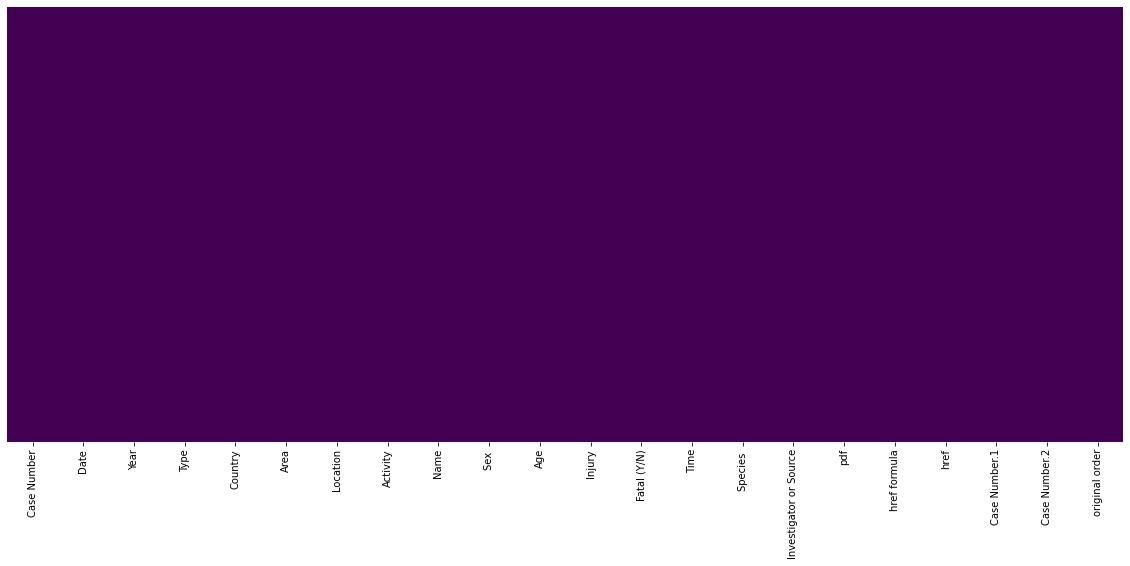

In [14]:
plt.figure(figsize=(20,8))  

sns.heatmap(df.isna(), 
           yticklabels=False,
           cmap='viridis',
           cbar=False)

plt.show()

In [15]:
df.shape

(6312, 22)

In [16]:
df['Fatal (Y/N)'].replace(['UNKNOWN', ' N', 'M','2017','N ','y'],
                  ['unknown','N','unknown','unknown','N','Y'], inplace=True)

In [17]:
df['Fatal (Y/N)'].value_counts()

N          4301
Y          1389
unknown     622
Name: Fatal (Y/N), dtype: int64

In [18]:
df.tail(10).index

Int64Index([6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 8702, 25722], dtype='int64')

In [19]:
df.drop(df.tail(10).index, inplace = True)

In [20]:
df.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,unknown,FATAL,Y,unknown,unknown,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,unknown,Pearl diving,Ahmun,M,unknown,FATAL,Y,unknown,unknown,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,unknown,FATAL,Y,unknown,unknown,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,unknown,"Panama Bay 8ºN, 79ºW",unknown,Jules Patterson,M,unknown,FATAL,Y,unknown,unknown,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,"FATAL. ""Shark bit him in half, carrying away t...",Y,unknown,unknown,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0


In [21]:
df.shape

(6302, 22)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             6302 non-null   object
 1   Date                    6302 non-null   object
 2   Year                    6302 non-null   object
 3   Type                    6302 non-null   object
 4   Country                 6302 non-null   object
 5   Area                    6302 non-null   object
 6   Location                6302 non-null   object
 7   Activity                6302 non-null   object
 8   Name                    6302 non-null   object
 9   Sex                     6302 non-null   object
 10  Age                     6302 non-null   object
 11  Injury                  6302 non-null   object
 12  Fatal (Y/N)             6302 non-null   object
 13  Time                    6302 non-null   object
 14  Species                 6302 non-null   object
 15  Inve

In [23]:
df['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'unknown', 'Boat', 'Boatomg'], dtype=object)

In [24]:
df['Type'].replace(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', 'unknown', 'Boat', 'Boatomg'],
                  ['Boat','Unprovoked','Invalid','Provoked','unknown','Sea disaster', 'unknown', 'Boat', 'Boat'], inplace=True)

In [25]:
df['Type'].unique()

array(['Boat', 'Unprovoked', 'Invalid', 'Provoked', 'unknown',
       'Sea disaster'], dtype=object)

In [26]:
df['Activity'].value_counts().unique()

array([971, 869, 544, 431, 333, 162, 149, 127,  99,  89,  76,  61,  49,
        47,  33,  32,  29,  19,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1])

In [27]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [28]:
df['Sex '].unique()

array(['F', 'M', 'unknown', 'M ', 'lli', 'N', '.'], dtype=object)

In [29]:
df['Sex '].replace(['F', 'M', 'unknown', 'M ', 'lli', 'N', '.'], 
                   ['F', 'M', 'unknown', 'M', 'unknown', 'unknown', 'unknown'], inplace = True)

In [30]:
df['Sex '].unique()

array(['F', 'M', 'unknown'], dtype=object)

In [31]:

def cleanact(x):
    dicc_actividades = {'Fishing':re.search('.*[Ff](ishing|ISHING).*',str(x)),
                    'Swimming':re.search('.*[Ss](wimming|WIMMing).*',str(x)),
                    'Kite':re.search('.*[Kk](ite|ITE).*',str(x)),
                    'Walking':re.search('.*[Ww](alking|ALKING).*',str(x)),
                    'Boogie Board':re.search('.*[Bb](oogie|OOGIE).*',str(x)),
                    'Body Boarding':re.search('.*[Bb](ody|ODY).*',str(x)),
                    'Wind Surfing':re.search('.*[wW](ind|IND).*',str(x)),
                    'Boat':re.search('.*[Bb](oat|OAT).*',str(x)),
                    'Interact with sharks':re.search('.*[Ss](hark|HARK).*',str(x)),
                    'Diving':re.search('.*[Dd](iving|IVING).*',str(x)),
                    'Standing in water':re.search('.*[Ss](tand|TAND).*',str(x)),
                    'Paddling':re.search('.*[Pp](addl|ADDL).*',str(x)),
                    'Bathing':re.search('.*[Bb](athing|ATHING).*',str(x)),
                    'OverBoard':re.search('.*[Oo](verb|VERB).*',str(x)),
                    'Bathing':re.search('.*[Bb](athing|ATHING).*',str(x)),
                    'Floating':re.search('.*[Ff](loat|LOAT).*',str(x)),
                    'Jumping':re.search('.*[Jj](ump|UMP).*',str(x))}
    for key,values in dicc_actividades.items():
        if values:
            return key
    return 'other'







df['Activity'] = df['Activity'].apply(cleanact)

In [34]:
df['Activity'].value_counts()

other                   2488
Fishing                 1172
Swimming                1106
Diving                   511
Bathing                  185
Interact with sharks     154
Standing in water        141
Body Boarding            136
Boat                     105
OverBoard                 85
Boogie Board              51
Floating                  45
Paddling                  37
Walking                   26
Wind Surfing              23
Kite                      22
Jumping                   15
Name: Activity, dtype: int64